In [1]:
import importlib.util
if importlib.util.find_spec('empylib') is None:
    !pip install git+https://github.com/PanxoPanza/empylib.git

# Tutorial 1 - Modelos ópticos

Este es un tutorial para utilizar las principales librerías del paquete ```empylib```. Estas son:
- Funciones básicas en `empylib`.
- `nklib` para estimación de índices de refracción.
- `waveoptics` para cálculo de propiedades de reflectancia y transmitancia de ondas electromagnéticas.
- `miescattering` para cálculo scattering y absorción de luz
- `rad_transfer` para simulaciones de transferencia de energía radiativa.

Primero, importamos los paquetes estandar de `numpy` y `matplotlib`

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Conversión de unidades

In [3]:
import empylib as em

La librería ```empylib``` cuenta con la función ```convert_units(x, x_in, to)``` para convertir unidades. Los parámetros de entrada son:
- ```x```: lista de valores a convertir (formato *ndarray*)
- ```x_in```: unidad de la lista de valores (formato *string*)
- ```to```: unidad a convertir (formato *string*)

La función retorna la lista de valores en ```x``` convertido a la unidad ```to```.

Como opciones, la función permite convertir las siguientes unidades:
- Nanometros ($\lambda$) : ```'nm'```
- Micrometros ($\lambda$) : ```'um'```
- Centímetros recíprocos : ```'cm^-1'```
- Frecuencia ($\nu$) : ```'Hz'```
- Frecuencia angular ($\omega$) : ```'rad/s'```
- Electron volts ($E_{\hbar\omega}$) : ```'eV'```

Por ejemplo, realicemos la conversión del espectro $\lambda \in [0.3,1.0]$ $\mu$m considerando 8 puntos igualmente espaciados, a unidades de eV.

In [4]:
lam = np.linspace(0.3,1.0,8)   # espectro de longitudes de onda en um
print('longitudes de onda en um:\n', lam)

lam_in_eV = em.convert_units(lam,'um','eV') # convertimos lam a unidades de eV
print('longitudes de onda en eV:\n', lam_in_eV)

longitudes de onda en um:
 [0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
longitudes de onda en eV:
 [4.13280655 3.09960491 2.47968393 2.06640327 1.77120281 1.54980245
 1.37760218 1.23984196]


In [5]:
# revertimos el proceso para recuperar las longitudes de onda en um
lam_in_um = em.convert_units(lam_in_eV,'eV','um') # convertimos lam a unidades de eVicrones
print('longitudes de onda en um:\n', lam_in_um)

longitudes de onda en um:
 [0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


## Índices de refracción (```nklib```)

In [6]:
import empylib.nklib as nk

### Índices de refracción tabulados
La librería ```empylib.nklib``` contiene una serie de funciones para determinar el coeficiente de refracción complejo, $N = n + i\kappa$.

Entre la lista de materiales disponibles tenemos:
- Agua (```H2O```)
- Oro (```gold```)
- Plata (```silver```)
- Cobre (```Cu```)
- Aluminio (```Al```)
- Silice (```SiO2```)
- Silicio (```Si```)
- Dióxido de Titanio (```TiO2```)

Para utilizar las funciones debemos, primero, generar un arreglo con las longitudes de onda que deseamos graficar, y luego evaluar la función para determinar el índice de refracción.

Por ejemplo, supongamos que necesitamos el índice de refracción del sílice en el espectro $\lambda\in[0.5,20]$ $\mu$m.

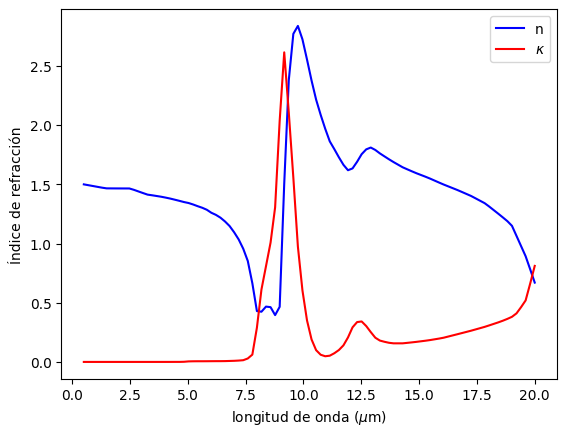

In [7]:
lam = np.linspace(0.5,20,100)   # arreglo de 100 datos entre 0.5 y 5.0 micrones
N   = nk.SiO2(lam)              # índice de refracción del sílice

# graficamos el índice de refracción
plt.plot(lam, N.real,'-b', label = 'n')
plt.plot(lam, N.imag,'-r', label = '$\kappa$')
plt.xlabel('longitud de onda ($\mu$m)')
plt.ylabel('Índice de refracción')
plt.legend()
plt.show()

También podemos extraer un valor puntual, para una longitud de onda específica. Por ejemplo, si necesitamos el índice de refracción del aluminio en $\lambda = 0.5$ $\mu$m, hacemos:

In [8]:
lam0 = 0.5
nk.Al(lam0)

(0.8125653662219986+6.048056732947395j)

### Modelos de Drude y Lorentz
La librería ```empylib.nklib``` también posee funciones para determinar el **índice de refracción** a partir de modelos de Drude y Lorentz.

> Notar que estas funciones entregan el **índice de refracción**. Para esto, cada función toma el modelo de Drude o Lorentz  para determinar la **constante dieléctrica** $\varepsilon$, según lo [visto en clases](https://panxopanza.github.io/conversion_solar_termica/3_Interacci%C3%B3n_materia-luz/3_Interacci%C3%B3n_materia-luz.html). Luego el índice de refracción se determina a partir de $\sqrt{\varepsilon}$

Cada modelo requiere una serie de parámetros. Podemos verificar los parámetros requeridos mediante la función ```help```.

In [9]:
help(nk.lorentz)

Help on function lorentz in module empylib.nklib:

lorentz(epsinf, wp, wn, gamma, lam)
    Refractive index from Lorentz model
    
    Parameters
    ----------
    epsinf : float
        dielectric constant at infinity.
    wp : float
        Plasma frequency, in eV (wp^2 = Nq^2/eps0 m).
    wn : float
        Natural frequency in eV
    gamma : float
        Decay rate in eV
    lam : linear np.array
        wavelength spectrum in um
    
    Returns
    -------
    complex refractive index



Como vemos la función ```lorentz``` requiere los parámetros $\omega_p$, $\omega_n$ y $\Gamma$ en unidades de eV, además de $\varepsilon_\infty$. Por último, la función también requiere el espectro de longitudes de onda en unidades de micrones (um) a partir de la variable ```lam```.

En el siguiente ejemplo, graficaremos el modelo de Lorentz para $\lambda\in[2,20]$ $\mu$m, considerando los siguientes parámetros:
- $\omega_n = 0.124$ eV ($\approx 10$ $\mu$m)
- $\omega_p = 0.150$ eV 
- $\Gamma = 0.01$ eV
- $\varepsilon_\infty = 2.25$ 

**Índice de refracción según modelo de Lorentz**

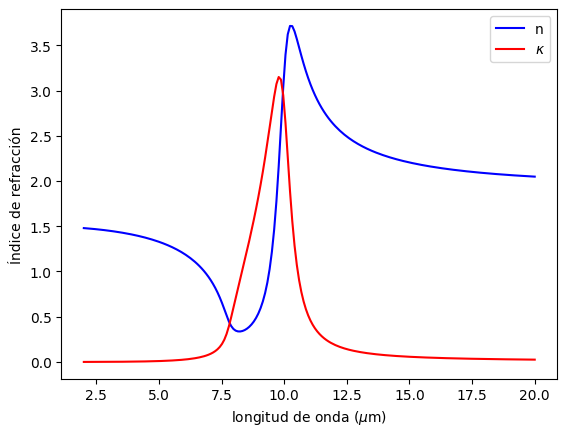

In [10]:
lam = np.linspace(2,20,200)   # arreglo de 100 datos entre 0.5 y 5.0 micrones

wn = 0.124  # Frecuencia natural (eV)
wp = 0.150  # Frecuencia wp (eV)
T = 0.01    # Taza de decaimiento (eV)
eps0 = 2.25

Nlorentz   = nk.lorentz(eps0,wp,wn,T,lam)  # índice de refracción modelo de drude

# graficamos el índice de refracción
plt.plot(lam, Nlorentz.real,'-b', label = 'n')
plt.plot(lam, Nlorentz.imag,'-r', label = '$\kappa$')
plt.xlabel('longitud de onda ($\mu$m)')
plt.ylabel('Índice de refracción')
plt.legend()
plt.show()

**Constante dieléctrica según modelo de Lorentz**

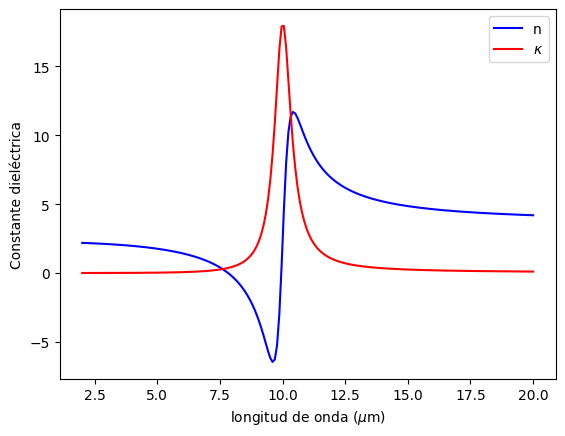

In [11]:
eps_lorentz = Nlorentz**2

# graficamos el índice de refracción
plt.plot(lam, eps_lorentz.real,'-b', label = 'n')
plt.plot(lam, eps_lorentz.imag,'-r', label = '$\kappa$')
plt.xlabel('longitud de onda ($\mu$m)')
plt.ylabel('Constante dieléctrica')
plt.legend()
plt.show()

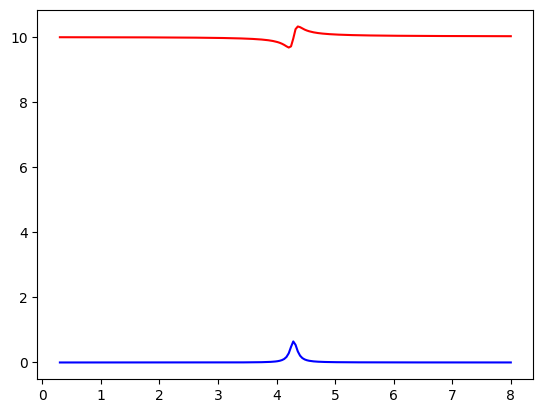

In [12]:
lam = np.linspace(0.3,8,200)   # arreglo de 100 datos entre 0.5 y 5.0 micrones

eps0=10
wn = 0.289    # Frecuencia natural (eV)
wp = 0.15*wn  # Frecuencia wp (eV)
T = 0.01      # Taza de decaimiento (eV)

nkco2 = nk.lorentz(eps0,wp,wn,T,lam)
epsco2 = nkco2**2

plt.plot(lam, epsco2.real,'r')
plt.plot(lam, epsco2.imag,'b')

**Constante dieléctrica del agua modelo de Lorentz**

Ahora, generemos la constante dieléctrica del agua a partir del modelo de Lorentz.

En el caso del agua, tenemos dos modos de vibración ([referencia](https://youtu.be/1uE2lvVkKW0)). Así, el modelo de Lorentz es:

\begin{equation*}
\varepsilon = \varepsilon_\infty + \frac{\omega_{p_1}^2}{\omega_{n_1}^2 - \omega^2 - i\Gamma \omega} + \frac{\omega_{p_2}^2}{\omega_{n_2}^2 - \omega^2 - i\Gamma \omega},
\end{equation*}

donde $\omega_{n_1}$ y $\omega_{n_2}$ son las frecuencias naturales de los modos de vibración.

Como aproximación consideramos:
- $\Gamma = 0.01$ eV
- $\omega_{p_i} = 0.2\omega_{n_i}$ eV
- $\varepsilon_\infty$ = 2.0


In [13]:
# a partir del video tenemos
modos = np.array([3412, 1691])            # unidades de cm^(-1)
wn = em.convert_units(modos,'cm^-1','eV') # frecuencias naturales en eV
wn

array([0.42303408, 0.20965728])

Generamos nuestro modelo, y graficamos para $\lambda\in[2,10]$ $\mu$m

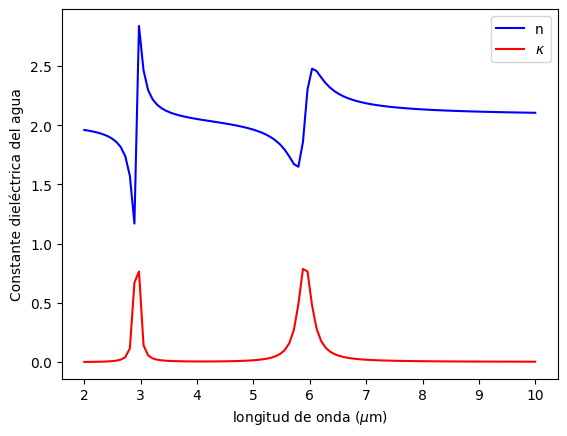

In [14]:
# generamos modelo del agua 

wp = 0.2*wn
gamma = 0.01
epsinf = 2

lam = np.linspace(2.0,10,100)   # espectro de longitudes de onda
# constante dielectrica del agua
eps_agua = epsinf + nk.lorentz(0, wp[0], wn[0], gamma, lam)**2 \
                  + nk.lorentz(0, wp[1], wn[1], gamma, lam)**2

# graficamos el índice de refracción
plt.plot(lam, eps_agua.real,'-b', label = 'n')
plt.plot(lam, eps_agua.imag,'-r', label = '$\kappa$')
plt.xlabel('longitud de onda ($\mu$m)')
plt.ylabel('Constante dieléctrica del agua')
plt.legend()
plt.show()

## Reflexión/Transmissión (```waveoptics```)

In [15]:
import empylib.waveoptics as wv

La librería ```empylib.waveoptics``` contiene funciones para calcular los coeficientes de Fresnel y Flujo de energía de la porción transmitida y reflejada de la luz incidente.
- ```interface``` para una [interface simple](https://panxopanza.github.io/conversion_solar_termica/2_ondas_EM_en_la_materia/2_ondas_EM_en_la_materia.html#coeficientes-de-fresnel)
- ```multilayer``` para multicapas de [película delgada](https://panxopanza.github.io/conversion_solar_termica/2_ondas_EM_en_la_materia/2_ondas_EM_en_la_materia.html#refleccion-y-transmission-en-peliculas-delgadas)

- ```incoh_multilayer``` para multicapas de película delgada ignorando fenómenos de interferencia (luz incoherente)

### Luz incidente en una interface (```interface```)
Esta función permite determinar los coeficientes de Fresnel y flujo de energía para la onda reflejada y transmitida a través de una interface. La función toma 4 argumentos: 
- ```theta```: ángulo de incidencia (en radianes)
- ```n1```: índice de refracción del medio sobre la interface
- ```n2```: índice de refracción del medio bajo la interface
- ```pol```: Polarización de la onda incidente (```'TM' ``` o ```'TE' ```)

La función necesita como mínimo 3 argumentos: ```theta```, ```n1```, ```n2```. En ese caso, ```pol= 'TM' ``` por defecto.

En el orden respectivo, el output es:
- Reflectividad ```R``` y Tranmisividad ```T```
- coefientes de Fresnel de reflexión ```r``` y transmisión ```t```.

En el siguiente ejemplo analizaremos una interface que separa aire (índice de refracción 1.0) y un metal de Drude con $\omega_p = 3.1$ eV (aprox 0.4 $\mu$m), $\Gamma = 0.01$ eV y $\varepsilon_\infty = 1.0$. El ángulo de incidencia es $\theta_i = 30°$.

>Notar que ```n1=1.0``` es un valor ```float``` unidimencional, mientras que ```n2``` es un arreglo en el espectro $\lambda \in [0.3,1.0]$ $\mu$m. En este caso, la función repite ```n1=1.0``` por cada valor espectral de ```n2```. **En el caso que ```n1``` y ```n2``` sean un arreglo, ambos deben tener igual dimención.**

In [16]:
R, T = wv.interface(0,1.0,2.0, pol='TM')[:2] # extraer los dos primeros elementos de la función
print(R, T)

[0.11111111] [0.88888889]


In [17]:
theta = np.radians(30)         # Angulo de incidencia (radianes)
lam = np.linspace(0.3,1.0,100) # Espectro de longitudes de onda

# Modelo de Drude
epsinf = 1.0 
wp = 2.1      # en eV (aproximadamente 0.4 micrones)
gamma = 0.01  # en eV

n2 = nk.drude(epsinf,wp,gamma,lam) # índice de refracción
n1 = 1.0

# Coeficientes de Fresnel y flujo de energia
Rp, Tp, rp, tp = wv.interface(theta,n1,n2, pol='TM') # polarizacion TM
Rs, Ts, rs, ts = wv.interface(theta,n1,n2, pol='TE') # polarizacion TE

Abajo graficamos los coeficientes de Fresnel a la izquierda (solo la parte real) y el flujo de energía a la derecha. Notar como la reflectividad aumenta para $\lambda < 2\pi c_0/\omega_p$

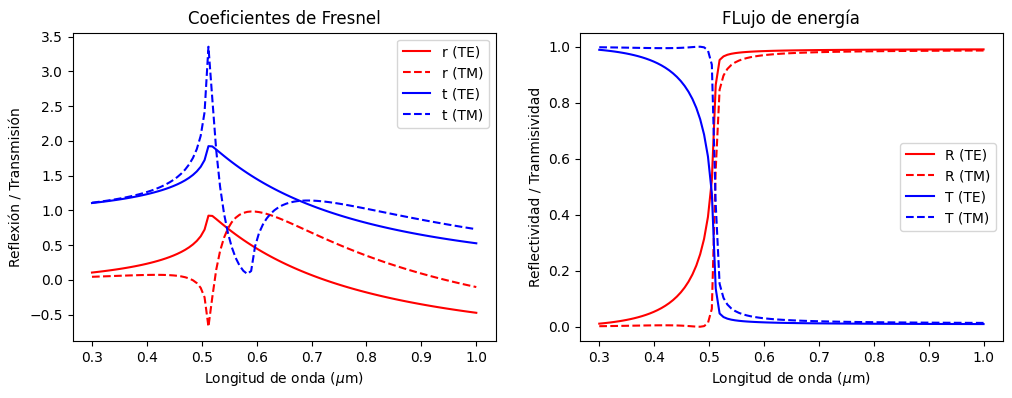

In [18]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,4)
ax[0].plot(lam,rs.real, '-r',label = 'r (TE)')
ax[0].plot(lam,rp.real,'--r',label = 'r (TM)')
ax[0].plot(lam,ts.real, '-b',label = 't (TE)')
ax[0].plot(lam,tp.real,'--b',label = 't (TM)')
ax[0].set_title('Coeficientes de Fresnel')
ax[0].set_xlabel('Longitud de onda ($\mu$m)')
ax[0].set_ylabel('Reflexión / Transmisión')
ax[0].legend()

ax[1].plot(lam,Rs, '-r',label = 'R (TE)')
ax[1].plot(lam,Rp,'--r',label = 'R (TM)')
ax[1].plot(lam,Ts, '-b',label = 'T (TE)')
ax[1].plot(lam,Tp,'--b',label = 'T (TM)')
ax[1].set_title('FLujo de energía')
ax[1].set_xlabel('Longitud de onda ($\mu$m)')
ax[1].set_ylabel('Reflectividad / Tranmisividad')
ax[1].legend()
plt.show()

### Luz incidente en arreglos multicapas (```multilayer```)
Esta función permite determinar los coeficientes de Fresnel y flujo de energía para la onda reflejada y transmitida a través de un arreglo de multicapas. La función toma 5 argumentos: 
- ```lam```: Espectro de longitudes de onda (en $\mu$m)
- ```tt```: ángulo de incidencia (en radianes)
- ```N```: arreglo tuple con índices de refracción de cada capa + medio superior e inferior al arreglo
- ```d```: arreglo tuple con espesores de cada capa (en micrones)
- ```pol```: Polarización de la onda incidente (```'TM' ``` o ```'TE' ```)

La función necesita como mínimo 4 argumentos: ```lam```, ```tt``` ```N``` y ```d```. En ese caso, ```pol= 'TM' ``` por defecto.
 
En el orden respectivo, el output es:
- Reflectividad ```R``` y Tranmisividad ```T```
- coefientes de Fresnel de reflexión ```r``` y transmisión ```t```.

Los elementos de ```N``` y  ```d```, deben estar ordenados según la dirección de la onda incidente. Por ejemplo, si consideramos: 
- luz incidente ($\theta_i = 45°$, $\lambda\in[0.3,0.8]$ $\mu$m) 
- Propagandose en aire ($N_1 = 1.0$),
- La luz incide sobre una película de espesor $d = 300$ nm e índice de refracción $N_2 = 1.5$.
- La película está depositada sobre un sustrato con índice de refracción $N_3 = 5.0 + 3i$:

In [19]:
lam = np.linspace(0.3,0.8,100)  # espectro de longitudes de onda (um)
theta = np.radians(45)
N1 = 1.0 # aire
N2 = 1.5 # capa intermedia
N3 = 5.0 + 3j

N = (N1, N2, N3) # indices de refracción (above, mid, below)
d = 0.3          # 300 nm de espesor para capa intermedia

Rp, Tp, rp, tp = wv.multilayer(lam,theta, N, d, pol='TM')
Rs, Ts, rs, ts = wv.multilayer(lam,theta, N, d, pol='TE')

Notar que ```len(d) = len(N) - 2```, debido a que los índices superior e inferior corresponden a los medios semi-infinitos sobre y bajo la capa. 

Por ejemplo, si ahora queremos determinar la respuesta óptica de un arreglo de una capa delgada de sílice ($d_1 = 100$ nm) sobre una capa de plata ($d_2 = 10$ nm), sobre un sustrato con índice de refracción $n_{back} = 5.0$ 

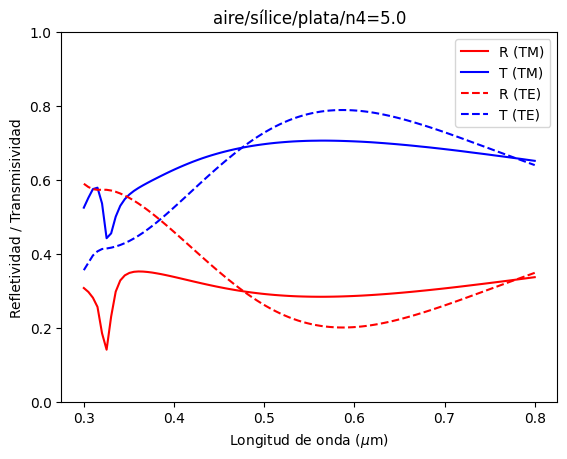

In [20]:
lam = np.linspace(0.3,0.8,100)  # espectro de longitudes de onda (um)
theta = np.radians(45)

Nfront = 1.0                 # índice de refracción medio superior
N1     = nk.SiO2(lam)        # índice de refracción sílice
N2     = nk.silver(lam)      # índice de refracción plata
Nback  = 5.0                 # índice de refracción medio inferior
N = (Nfront, N1, N2, Nback)  # indices de refracción (above, mid, below)

d = (0.100, 0.010) # espesor para sílice y plata (en ese orden)

Rp, Tp, rp, tp = wv.multilayer(lam,theta, N, d, pol='TM')
Rs, Ts, rs, ts = wv.multilayer(lam,theta, N, d, pol='TE')

# Graficamos el flujo de energía
plt.plot(lam,Rp,'-r',label='R (TM)')
plt.plot(lam,Tp,'-b',label='T (TM)')
plt.plot(lam,Rs,'--r',label='R (TE)')
plt.plot(lam,Ts,'--b',label='T (TE)')
plt.title('aire/sílice/plata/n4=5.0')
plt.xlabel('Longitud de onda ($\mu$m)')
plt.ylabel('Refletividad / Transmisividad')
plt.ylim(0,1)
plt.legend()
plt.show()

### Luz incoherente en arreglos multicapas (```incoh_multilayer```)

Esta función es similar a ```multilayer``` pero para una fuente de luz incoherente. Considera los mismos 5 argumentos de ```multilayer``` con un argumento adicional ```coh_length``` para condicionar la longitud de coherencia (en $\mu$m). Por defecto, ```coh_length = 0```

Debido a que la función es para luz incoherente, el output es:
- Reflectividad ```R``` y Tranmisividad ```T```

Por ejemplo, evaluemos el ejemplo de la [clase 2](https://panxopanza.github.io/conversion_solar_termica/2_ondas_EM_en_la_materia/2_ondas_EM_en_la_materia.html#refleccion-y-transmission-en-peliculas-delgadas) ($n_\mathrm{front}= 1.0$, $n_\mathrm{layer}= 1.5$, $n_\mathrm{back} = 4.3$), considerando una capa de espesor $d = 300$ nm, y $\theta_i = 30°$

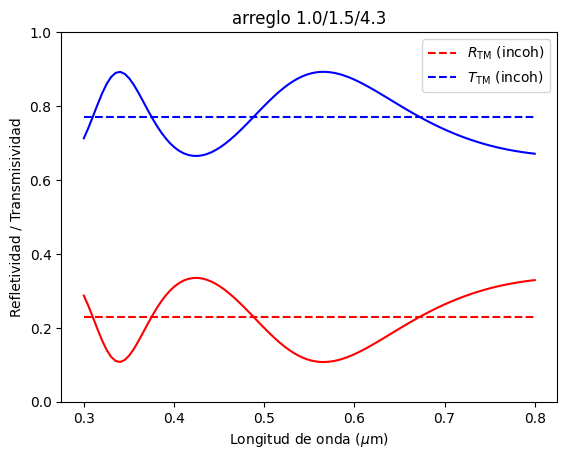

In [21]:
lam = np.linspace(0.3,0.8,100)  # espectro de longitudes de onda (um)
theta = np.radians(30)          # ángulo de incidencia

Nfront = 1.0                 # índice de refracción medio superior
N1     = 1.5                 # índice de refracción capa delgada
Nback  = 4.3                 # índice de refracción medio inferior
N = (Nfront, N1, Nback)      # indices de refracción (above, mid, below)

d = 0.3                      # espesor capa intermedia (um)

Rp_incoh, Tp_incoh = wv.incoh_multilayer(lam,theta, N, d, pol='TM') # caso luz incoherente

# Graficamos el flujo de energía
plt.plot(lam,Rp_incoh,'--r',label='$R_\mathrm{TM}$ (incoh)')
plt.plot(lam,Tp_incoh,'--b',label='$T_\mathrm{TM}$ (incoh)')
plt.title('arreglo 1.0/1.5/4.3')
plt.xlabel('Longitud de onda ($\mu$m)')
plt.ylabel('Refletividad / Transmisividad')
plt.ylim(0,1)
plt.legend()

# comparamos con el caso luz coherente
Rp, Tp = wv.multilayer(lam,theta, N, d, pol='TM')[:2]
plt.plot(lam,Rp,'-r',label='$R_\mathrm{TM}$ (coh)')
plt.plot(lam,Tp,'-b',label='$T_\mathrm{TM}$ (coh)')

plt.show()

En el límite de solo una interface, ```interface```, ```multilayer``` y ```incoh_multilayer``` entregan el mismo resultado

In [22]:
lam = 0.5                # longitud de onda en micrones
theta = np.radians(30)   # ángulo de incidencia (en radianes)                    

N = (1.0, 1.5)  # interface aire/silice
d = ()          # sin espesores (solo una interface)

print('interface:\t\t R = %.3f, T = %.3f' % wv.interface(theta,N[0],N[1])[:2])
print('multilayer:\t\t R = %.3f, T = %.3f' % wv.multilayer(lam,theta,N,d)[:2])
print('incoh_multilayer:\t R = %.3f, T = %.3f' % wv.incoh_multilayer(lam,theta,N,d))

interface:		 R = 0.025, T = 0.975
multilayer:		 R = 0.025, T = 0.975
incoh_multilayer:	 R = 0.025, T = 0.975


## Scattering de mie (```miescattering```)

In [23]:
import empylib.miescattering as mie

En esta librería, la función principal es ```scatter_efficiency```, que permite determinar las secciones transversales de scattering, absorción y extinción para una partícula esférica de diámetro $D$.

Los pámetros de entrada son:
- ```lam```: Espectro de longitudes de onda (en $\mu$m)
- ```Nh```: Índice de refracción del medio circundante
- ```Np```: Índice de refracción de la partícula
- ```D```: Diámetro de la partícula (en $\mu$m)

Los parámetros de salida son
- ```Qext```: coeficiente de extinción ($C_\mathrm{ext}/\pi R^2$)
- ```Qsca```: coeficiente de scattering ($C_\mathrm{sca}/\pi R^2$)
- ```gcos```: parámetro de asimetría

Los coeficientes de extinción ($Q_\mathrm{ext}$) y scattering ($Q_\mathrm{sca}$) se relacionan con las respectivas secciones transversales por $C_\mathrm{ext} = Q_\mathrm{ext}A_c$, $C_\mathrm{sca} = Q_\mathrm{sca}A_c$, donde $A_c = \pi D^2/4$ es la sección transversal de la esfera.

La sección transversal de absorción ($C_\mathrm{abs}$), se determina por $C_\mathrm{abs} = C_\mathrm{ext} - C_\mathrm{sca}$

En el ejemplo de abajo, calculamos la $C_\mathrm{abs}$, $C_\mathrm{sca}$ y $C_\mathrm{ext}$ para una partícula de oro de $D = 100$ nm de diámetro, alojada de sílice. El espectro considerado es $\lambda\in[0.3,1.0]$ $\mu$m

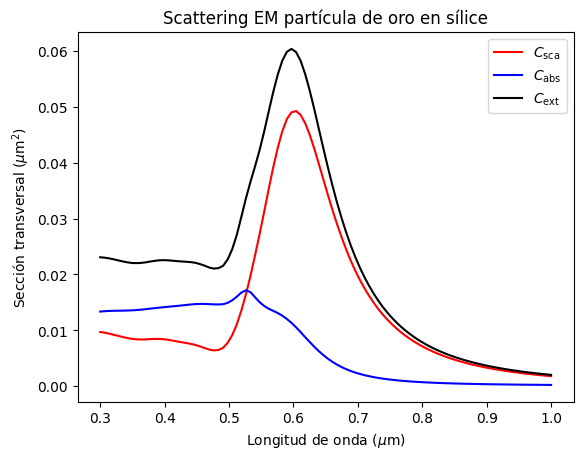

In [24]:
lam = np.linspace(0.3,1.0,100) #espectro de longitudes de onda (arreglo de 100 puntos entre 0.3 y 1.0 micrones)
Nh = nk.SiO2(lam) # índice de refracción medio circundante
Np = nk.gold(lam) # índice de refracción partícula
D = 0.100         # diámetro de la partícula (micrones)

# determinamos parámetros de eficiencia
qext, qsca = mie.scatter_efficiency(lam,Nh,Np,D)[:2]

# convertimos los resultados a secciones transversales
Ac = np.pi*D**2/4 # sección transversal de la partícula
Csca = qsca*Ac
Cext = qext*Ac
Cabs = Cext - Csca

# graficamos los resultados
plt.plot(lam,Csca,'-r',label='$C_\mathrm{sca}$')
plt.plot(lam,Cabs,'-b',label='$C_\mathrm{abs}$')
plt.plot(lam,Cext,'-k',label='$C_\mathrm{ext}$')
plt.xlabel('Longitud de onda ($\mu$m)')
plt.ylabel('Sección transversal ($\mu$m$^2$)')
plt.title('Scattering EM partícula de oro en sílice')
plt.legend()
plt.show()

## Transporte Radiativo (```rad_transfer```)

In [25]:
import empylib.rad_transfer as rt

Para transporte radiativo tenemos dos librerías:
- ```rad_transfer``` con funciones para cálculos simples (como Beer-Lambert)
- ```iadpython``` para simulaciones de scattering multiple

### Beer-Lambert (```T_beer_lambert```)
La función ```T_beer_lambert``` de la librería ```empylib.rad_transfer``` permite un rápido cálculo de la transmisivitidad a través de un medio de espesor $d$ con incrustaciones.

La función requiere los siguientes parámetros de entrada:
- ```lam```: Espectro de longitudes de onda (en $\mu$m)
- ```theta```: Ángulo de incidencia (en radianes)
- ```tfilm```: Espesor del material (en mm)
- ```N```: Índice de refracción del medio superior, material intermedio, y medio inferior (arreglo tuple ```len(N) = 3```)
- ```fv```: Fracción de volumen de las incrustaciones (0.01 corresponde a 1% v/v) 
- ```D```: Diámetro de la partícula (en $\mu$m)
- ```Np```: Índice de refracción de las partículas (se debe cumplir la condición: ```len(Np) = len(lam)```)

Los parámetros de salida (en orden) son:
- ```Ttot``` : Transmisividad total
- ```Rtot``` : Reflectividad total
- ```Tspec```: Transmisividad especular

En el siguiente ejemplo, consideramos una película de sílice de espesor $1.0$ mm, con porosidad de 0.01% donde los poros tienen un de diámetro $D = 200$ $\mu$m ($N_{poro} = 1.0$). Los medios superior e inferior corresponden a aire. La luz incide en dirección $\theta_i = 0°$.

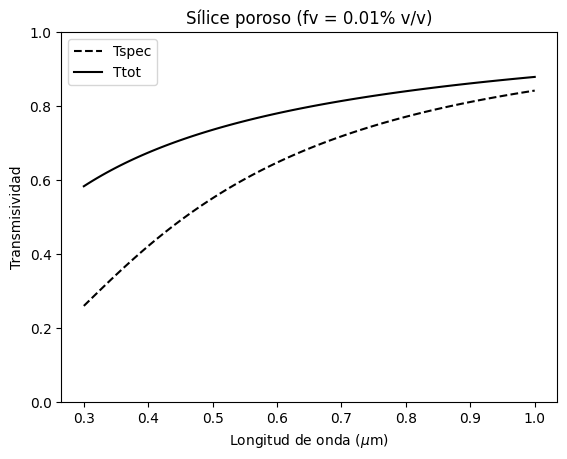

In [26]:
lam = np.linspace(0.3,1.0,100)  # espectro de longitudes de onda (en micrones)
theta = np.radians(0)           # 30 grados en radianes
tfilm = 1.0                     # espesor en mm
N = (1.0,nk.SiO2(lam),1.0)      # indice de refracción superior, intermedio e inferior
fv = 0.0001                     # fracción de volúmen de los poros
D = 0.2                         # diámetro de los poros (micrones)
Np = 1.0                        # índice de refracción de las incrustaciones

Ttot, Rtot, Tspec = rt.T_beer_lambert(lam,theta,tfilm,N,fv,D,Np)

plt.plot(lam,Tspec,'--k',label = 'Tspec')
plt.plot(lam,Ttot,'-k',label = 'Ttot')
plt.xlabel('Longitud de onda ($\mu$m)')
plt.ylabel('Transmisividad')
plt.title(r'Sílice poroso (fv = 0.01% v/v)')
plt.legend()
plt.ylim(0,1)
plt.show()

### Scattering multiple (```adm_sphere```)

La función ```adm_sphere``` de la librería ```empylib.rad_transfer``` permite el cálculo de scattering múltiple en una película con incrustaciones entre dos medios semi-infinitos. La función utliza la librería ```iadpython``` la cual utiliza el ***adding doubling method (adm)*** para resolver la RTE numéricamente. 

La función requiere los siguientes parámetros de entrada:
- ```lam```: Espectro de longitudes de onda (en $\mu$m)
- ```theta```: Ángulo de incidencia (en radianes)
- ```tfilm```: Espesor del material (en mm)
- ```N```: Índice de refracción del medio superior, material intermedio, y medio inferior (arreglo tuple ```len(N) = 3```)
- ```fv```: Fracción de volumen de las incrustaciones (0.01 corresponde a 1% v/v) 
- ```D```: Diámetro de la partícula (en $\mu$m)
- ```Np```: Índice de refracción de las partículas (se debe cumplir la condición: ```len(Np) = len(lam)```)

Los parámetros de salida son:
- ```Ttot```: Transmisividad total
- ```Rtot```: Reflectividad total
- ```Tspec```: Transmisividad specular
- ```Rspec```: Reflectividad specular

En el ejemplo, se modela una pekícula de agua con partículas de sílice suspendidas con las siguientes características:
- Espesor de la película de agua: 1 mm
- concentración de partículas de sílice: 0.1 % v/v
- Tamaño de las partículas: $0.3$ $\mu$m
- Espectro $\lambda\in[0.3,1.0]$ $\mu$m

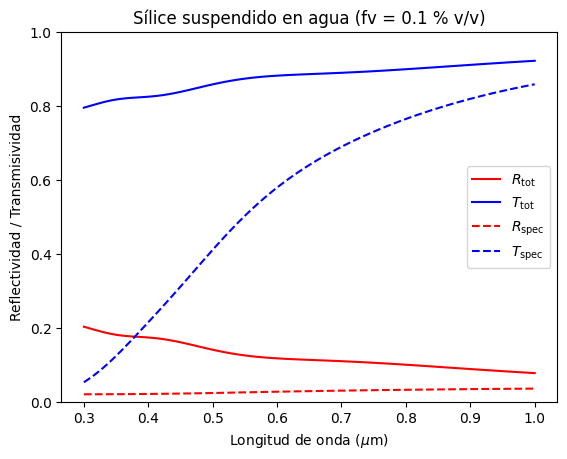

In [27]:
lam = np.linspace(0.3,1.0,100) # espectro de longitudes de onda
tfilm = 1                      # espesor en mm
N = (1.0,1.33,1.0)             # indice de refracción superior, intermedio e inferior
fv = 0.001                     # fracción de volúmen de los poros
D = 0.3                        # diámetro de los poros (micrones)
Np = nk.SiO2(lam)              # índice de refracción partícula

Ttot, Rtot, Tspec, Rspec = rt.adm_sphere(lam,tfilm,N,fv,D,Np)

plt.plot(lam,Rtot,'-r',label='$R_\mathrm{tot}$')
plt.plot(lam,Ttot,'-b',label='$T_\mathrm{tot}$')
plt.plot(lam,Rspec,'--r',label='$R_\mathrm{spec}$')
plt.plot(lam,Tspec,'--b',label='$T_\mathrm{spec}$')
plt.xlabel('Longitud de onda ($\mu$m)')
plt.ylabel('Reflectividad / Transmisividad')
plt.title(r'Sílice suspendido en agua (fv = %.1f %% v/v)' % (fv*100))
plt.legend()
plt.ylim(0,1)
plt.show()